<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

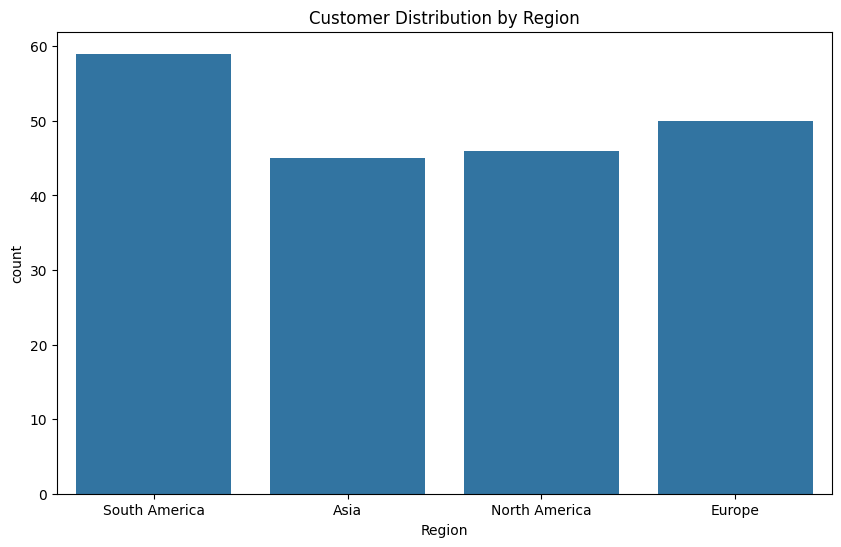

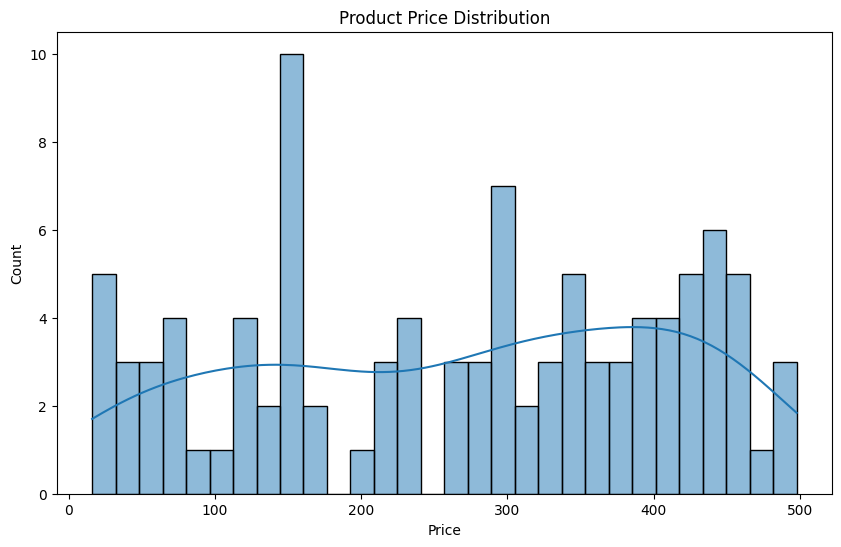

<ipython-input-1-80a2f6195ef9>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.resample('M').sum()['TotalValue'].plot(figsize=(10, 6))


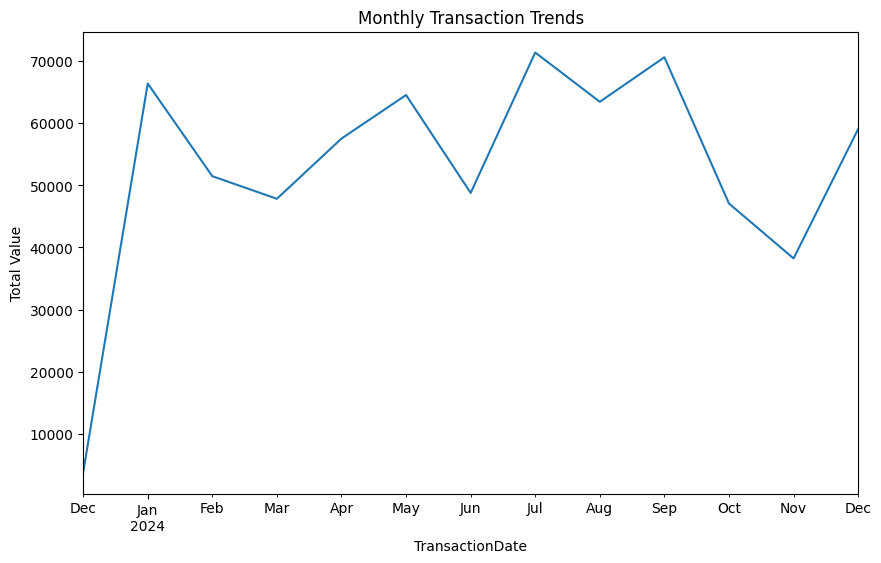

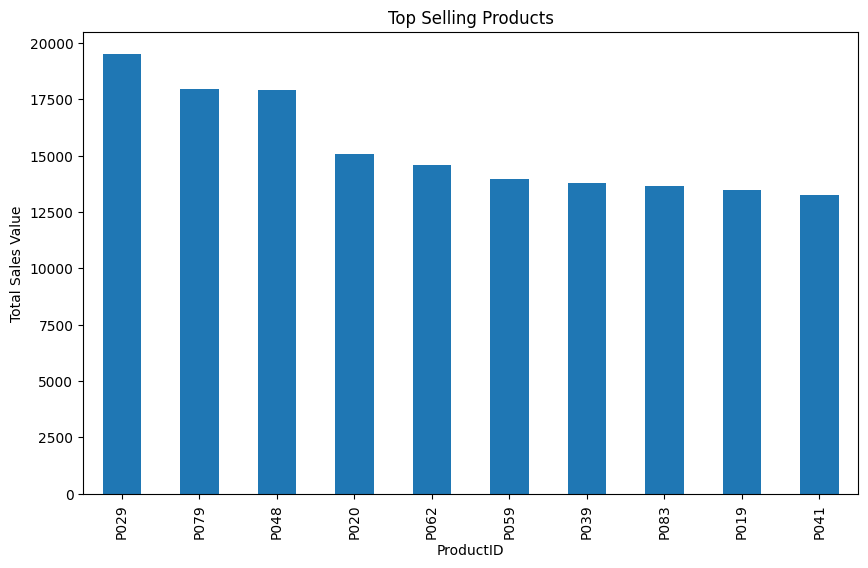

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')
print(customers.info())
print(products.info())
print(transactions.info())

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.describe())
print(products.describe())
print(transactions.describe())

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.show()
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate', inplace=True)
transactions.resample('M').sum()['TotalValue'].plot(figsize=(10, 6))
plt.title('Monthly Transaction Trends')
plt.ylabel('Total Value')
plt.show()

top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top Selling Products')
plt.ylabel('Total Sales Value')
plt.show()